<a href="https://colab.research.google.com/github/Amina-bzr/HR-Management-App-BACKEND/blob/main/DATA_CLASSIFICATIN_AND_CLUSTRING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 1: DecisionTreeClassifier, the max_depth paremeter

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn import tree
#--------------------fin import

tictactoe_cols=["top-left-square","top-middle-square","top-right-square","middle-left-square","middle-middle-square","middle-right-square", "bottom-left-square","bottom-middle-square","bottom-right-square","class"]
#lecture data
car_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP4_DATA/car.data', sep= ',')
tictactoe_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP4_DATA/tic-tac-toe.data', sep= ',', names=tictactoe_cols)

Y=tictactoe_data['class']
X=tictactoe_data.drop(['class'], axis=1)
x_dum=pd.get_dummies(X)


,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [49]:
#spitting the data for training
X_train, X_test, y_train, y_test = train_test_split( x_dum, Y, test_size = 0.3)


for depth in range(3,10):
  clf_entropy=DecisionTreeClassifier(criterion="entropy", max_depth=depth, min_samples_leaf=5)
  clf_entropy.fit(X_train, y_train)
  y_pred_en = clf_entropy.predict(X_test)
  print ("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  75.34722222222221
Accuracy is  81.25
Accuracy is  95.48611111111111
Accuracy is  96.875
Accuracy is  95.83333333333334
Accuracy is  95.83333333333334
Accuracy is  95.13888888888889


In [16]:
list(x_dum.index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,




# With K-fold cross validation



In [34]:
#For each max_depth, you use the K-fold cross-validation method, for K=10, to compute the
#average accuracy of the classifier.
from sklearn.model_selection import KFold

kf=KFold(n_splits=10)

for train, test in kf.split(x_dum):
  ac=0
  print("\n--------------------------\nnew train, test set start:\n--------------------------")
  X_train, X_test, y_train, y_test = x_dum.iloc[train], x_dum.iloc[test], Y.iloc[train], Y.iloc[test]
  print("data size: "+str(X_train.size))
  for depth in range(3,10):
    clf_entropy=DecisionTreeClassifier(criterion="entropy", max_depth=depth, min_samples_leaf=5)
    clf_entropy.fit(X_train, y_train)
    y_pred_en = clf_entropy.predict(X_test)
    ac_score=accuracy_score(y_test,y_pred_en)*100
    ac=ac+ac_score
  ac_avg=ac/10
  print ("Average Accuracy is: ", ac_avg)


--------------------------
new train, test set start:
--------------------------
data size: 23274
Average Accuracy is:  34.27083333333333

--------------------------
new train, test set start:
--------------------------
data size: 23274
Average Accuracy is:  38.33333333333333

--------------------------
new train, test set start:
--------------------------
data size: 23274
Average Accuracy is:  61.145833333333336

--------------------------
new train, test set start:
--------------------------
data size: 23274
Average Accuracy is:  18.020833333333336

--------------------------
new train, test set start:
--------------------------
data size: 23274
Average Accuracy is:  47.08333333333333

--------------------------
new train, test set start:
--------------------------
data size: 23274
Average Accuracy is:  53.854166666666664

--------------------------
new train, test set start:
--------------------------
data size: 23274
Average Accuracy is:  29.062499999999993

----------------------

# Exercice 2: DecisionTreeClassifier, influence of the size of test data

In [39]:
sizes=[0.1, 0.25, 0.33, 0.5, 0.66, 0.75]

for size in sizes:
  ac=0
  print("\ntrain_size is "+str(size*100)+"%")
  print("----------------------")
  for i in range(0,10):
    #spitting the data for training, with train set size = size
    X_train, X_test, y_train, y_test = train_test_split( x_dum, Y, train_size = size)
    #creating the classifier and training
    clf_entropy=DecisionTreeClassifier(criterion="entropy")
    clf_entropy.fit(X_train, y_train)
    y_pred_en = clf_entropy.predict(X_test)
    #calculating accuracy
    ac_score=accuracy_score(y_test,y_pred_en)*100
    ac=ac+ac_score
  avg_ac=ac/10
  print ("Average accuracy is "+str(avg_ac) )



train_size is 10.0%
----------------------
Average accuracy is 71.04287369640788

train_size is 25.0%
----------------------
Average accuracy is 84.71488178025035

train_size is 33.0%
----------------------
Average accuracy is 87.19626168224299

train_size is 50.0%
----------------------
Average accuracy is 91.27348643006263

train_size is 66.0%
----------------------
Average accuracy is 92.63803680981596

train_size is 75.0%
----------------------
Average accuracy is 93.04166666666667


As we can see, the greater the training set data size, the better the model scores.

# Explaning the 4 linkage methods of the Aglomerative clustring

In [45]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering

#function for plotting the dendogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


#generating a random numpy array for testing the classifier
np.random.seed(42)
data = np.random.rand(20, 2)

# single

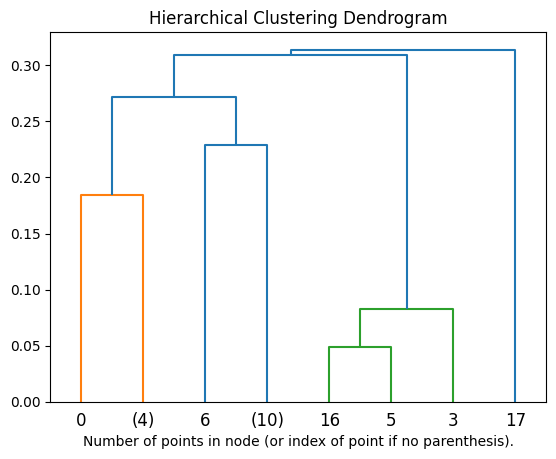

In [46]:
# setting distance_threshold=0 ensures we compute the full tree
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single')

model = model.fit(data)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# Average

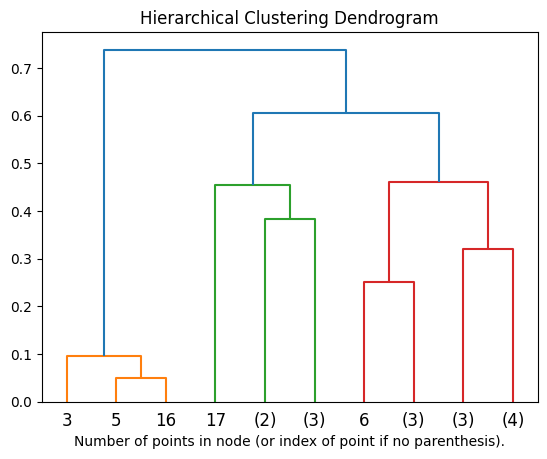

In [47]:
# setting distance_threshold=0 ensures we compute the full tree
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')

model = model.fit(data)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# complete

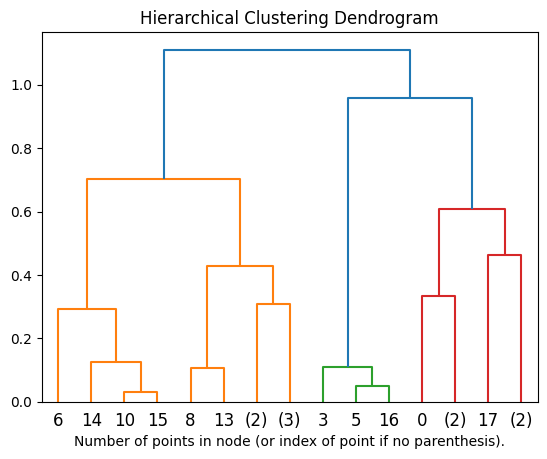

In [42]:
# setting distance_threshold=0 ensures we compute the full tree
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')

model = model.fit(data)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()